In [1]:
# Lynda.com course
# Python: Data Analysis

# Chapter 5: Weather Data with Numpy
# Challenge:

# After retrieving a list of weather stations and weather data from NOAA:
# 1) Find the year with the highest mean TMAX in Minneapolis (cold location)
# 2) Find the year with the lowest mean TMIN in San Diego (warm location)
# 3) In the same plot, show the TMIN and TMAX throughout those specific years for those two cities

# See project_overview.txt for additional introductory comments

In [2]:
# Import packages that are needed for this task
from datetime import datetime # Record the data download time
import urllib.request # Download data
from random import sample # Look at random entries of the raw data; use numpy.random.choice() for arrays later
import numpy as np # For data analysis
import matplotlib.pyplot as pp # Plot data
# import seaborn # Optional (for fancier plotting options)

In [3]:
# Display plots inline
%matplotlib inline

In [4]:
# Get a list of weather stations from https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/
print('Accessed:', datetime.today()) # Keep track of when the data was downloaded
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

Accessed: 2018-06-16 06:49:36.983227


('stations.txt', <email.message.Message at 0x110fd7278>)

In [5]:
# Let's look at ten random lines (rather than the first ten) of the downloaded file stations.txt
sample(open('stations.txt','r').readlines(), 10)

['US1ILCK0063  42.0039  -87.9813  213.1 IL ELK GROVE VILLAGE 0.6 ESE                   \n',
 'CA003070970  57.9500 -116.2167  793.0 AB BUFFALO LO                                  \n',
 'USC00051698  38.3500 -105.7833 2104.9 CO COALDALE 2 SW                               \n',
 'MZM00067205 -11.3620   40.3550   27.1    MOCIMBOA DA PRAIA                      67205\n',
 'CA1PE000015  46.4325  -63.8215   30.2 PE SLEMON PARK 0.3 SSE - CLOSED                \n',
 'CA0040318MN  49.0500 -105.4833  756.0 SK CORONACH SPC                           71516\n',
 'USC00501662  61.8000 -148.4500  284.1 AK CHICKALOON                                  \n',
 'USS0007H05S  41.3000 -107.1500 2706.6 WY Divide Peak                                 \n',
 'USC00214103  46.3197  -93.5014  391.7 MN ISLE 12N                                    \n',
 'US1VAFX0033  38.7462  -77.1386   17.1 VA FRANCONIA 1.3 SSE                           \n']

In [6]:
# The first string is the station code, and further to the right is the station name
# The remaining data looks like location and elevation data, and the state if the station is in the US
# We can look at the readme.txt documentation file (downloaded later) for a detailed explanation

# We are interested in the stations from the GCOS Surface Network (tagged GSN)
# Make a dictionary of GSN stations with keys the station code
stations = {}

for line in open('stations.txt','r'):
    if ' GSN ' in line:
        fields = line.split() # For each line, make a list, split by white spaces

        # Use the first string as key, and assign the text after the fourth white space as value
        # To keep the code simple, we take all of the text after the fourth white space
        # Using the width of each string from the documentation, we could clean this up a bit more
        # See section IV. FORMAT OF "ghcnd-stations.txt" of readme.txt
        stations[fields[0]] = ' '.join(fields[4:])

# We can now look up a station by its station code (if known)

# Also display the total number of stations in our dictionary
len(stations)

991

In [7]:
# Note the blank spaces on either side of 'GSN' in the code that generates the dictionary stations
# This is to avoid stations whose names contain this substring
# A more sophisticated algorithm would look for the string only in the correct position for the network flag

# It turns out there are three stations whose names include the string 'GSN' but that do not belong to GSN:
imposter_stations = {}

for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        
        if fields[0] not in stations.keys():
            imposter_stations[fields[0]] = ' '.join(fields[4:])

imposter_stations

{'SF002955390': 'MEQUATLINGSNEK',
 'SF004066580': 'LAINGSNEK',
 'SWE00138026': 'RYNINGSNAS'}

In [8]:
# Write a function to find the dictionary entry of station(s) that contain a certain substring
def findstation(s):
    # All names are capitalized in the stations list
    # Use upper() method to avoid having to type all caps when looking up stations
    matches = {code: name for code, name in stations.items() if s.upper() in name}
    print(matches)

In [9]:
# For our challenge, we will be looking at Minneapolis and San Diego
findstation('minneapolis')
findstation('san diego')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}
{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [10]:
# Check if data for these two stations is available for ftp download
with urllib.request.urlopen('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/') as website:
    for line in website:
        line = line.decode('utf-8') # Decoding the binary data to text
        if 'USW00014922' in line:
            print('Data from Minneapolis station available.')
        elif 'USW00023188' in line:
            print('Data from San Diego station available.')

Data from Minneapolis station available.
Data from San Diego station available.


In [11]:
# Dowload Minneapolis station data
print('Accessed:', datetime.today())
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00014922.dly','minneapolis.dly')

Accessed: 2018-06-16 06:49:48.994502


('minneapolis.dly', <email.message.Message at 0x112605048>)

In [12]:
# Dowload San Diego station data
print('Accessed:', datetime.today())
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00023188.dly','san_diego.dly')

Accessed: 2018-06-16 06:49:53.240871


('san_diego.dly', <email.message.Message at 0x112605198>)

In [13]:
# Let's look at ten random lines of the Minneapolis data
sample(open('minneapolis.dly','r').readlines(), 10)

['USW00014922196512WT06-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       1  0-9999   -9999   -9999       1  0-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       1  0-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   \n',
 'USW00014922197803PGTM 1506  X 2318  X 1448  X 1406  X 1254  X 1142  X 0854  X 2212  X 0836  X 2336  X 0018  X 2154  X 1400  X 1012  X 1130  X 1354  X 1436  X 0854  X 1012  X 1036  X 1318  X 1124  X 1712  X 1754  X 1324  X 2200  X 2224  X 1412  X 0042  X 1112  X 2012  X\n',
 'USW00014922199305SNWD    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0\n',
 'USW00014922198604PRCP    0  0    3  0   99  0   69  0   25  0    0  0    0  0    0  0    0  0    0  0    0  0    3  0    0  0  279  0    8  0    0  0    0  0   86  0    8

In [14]:
# We are going to need (to download) the readme.txt documentation file
print('Accessed:', datetime.today())
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt','readme.txt')

Accessed: 2018-06-16 06:49:58.445818


('readme.txt', <email.message.Message at 0x1126052e8>)

In [15]:
# Format data into more usable format using numpy.genfromtxt
# Write a function first and specify the precise format below
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter, # widths of columns in the raw data
                         usecols = dly_usecols, # the columns we use
                         dtype = dly_dtype, # the data type of each column we use
                         names = dly_names) # the names we give those columns

In [16]:
# Formatting information from readme.txt (and/or structure of opened file)
# Section III. FORMAT OF DATA FILES (".dly" FILES) of readme.txt
# To read inline: open('readme.txt','r').readlines()[98:121]

# Each record in a file contains one month of daily data

# ID, year, month, element + data for each day of the month (value plus three flags)
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31

# Note: in an iteration, we should look at the three flags and clean up the data
# For instance, we can see below that there are a lot of 1's in the data that are flagged with an SFLAG1 = 'X'
# These appear to be for observations other than TMIN and TMAX, but worth looking into in second step

# Use year, month, element, and value columns (for days 1 through 31), but not station ID and flags
dly_usecols = [1,2,3] + [4*i for i in range(1,31+1)]

dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31 # specify numpy data types
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)] # column names

In [17]:
# Format data for the two stations of interest
minneapolis = parsefile('minneapolis.dly')
san_diego = parsefile('san_diego.dly')

In [18]:
# Let's take a look at one of them
# Note (from readme.txt and/or looking at the file): missing values are set to -9999
minneapolis

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,    94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,    39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0,   119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2018, 6, 'WSF5',   139,   130,   161,   134,   107,   188,   107,   130,  94,   139,   174, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2018, 6, 'WT01',

In [19]:
# Format data for a particular month into a numpy array
def unroll(record):
    # {}-{:02} = date format
    startdate = np.datetime64('{}-{:02}'.format(record['year'], record['month']))

    # Start on first of given month and increment by one day until first of next month (not included)
    dates = np.arange(startdate, startdate + np.timedelta64(1,'M'), np.timedelta64(1,'D'))

    # TMAX and TMIN in tenths of degrees Celsius, see readme.txt
    # Thus divide by 10 to get temperature in Celsius
    rows = [(date, record[str(i + 1)]/10) for i, date in enumerate(dates)]

    return np.array(rows, dtype=[('date','M8[D]'),('value','d')])

In [20]:
# Let's look at the last month on record
unroll(minneapolis[-1])

array([('2018-06-01', -9.999e+02), ('2018-06-02', -9.999e+02),
       ('2018-06-03', -9.999e+02), ('2018-06-04', -9.999e+02),
       ('2018-06-05', -9.999e+02), ('2018-06-06',  1.000e-01),
       ('2018-06-07', -9.999e+02), ('2018-06-08', -9.999e+02),
       ('2018-06-09',  1.000e-01), ('2018-06-10', -9.999e+02),
       ('2018-06-11', -9.999e+02), ('2018-06-12', -9.999e+02),
       ('2018-06-13', -9.999e+02), ('2018-06-14', -9.999e+02),
       ('2018-06-15', -9.999e+02), ('2018-06-16', -9.999e+02),
       ('2018-06-17', -9.999e+02), ('2018-06-18', -9.999e+02),
       ('2018-06-19', -9.999e+02), ('2018-06-20', -9.999e+02),
       ('2018-06-21', -9.999e+02), ('2018-06-22', -9.999e+02),
       ('2018-06-23', -9.999e+02), ('2018-06-24', -9.999e+02),
       ('2018-06-25', -9.999e+02), ('2018-06-26', -9.999e+02),
       ('2018-06-27', -9.999e+02), ('2018-06-28', -9.999e+02),
       ('2018-06-29', -9.999e+02), ('2018-06-30', -9.999e+02)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [21]:
# 2018 is not over yet, so the data for the year is obviously incomplete
# Also information appears to be missing
# Best to exclude 2018 from our later analysis
# There are the 1's again mentioned earlier, but this record is not temperature data

# We could also look at a random month (and random observation) within the available data
# unroll(np.random.choice(minneapolis))
# But this makes more sense later once we filtered out only the observations we are interested in

# Filter out data for a specific observation (such as TMIN or TMAX)
def getobs(filename, obs):
    # Only take data corresponding to the observation obs (the second argument of the function)
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

    # Replace placeholder -999.9 (= - 9999/10) for missing data by 'nan' (not a number) using boolean mask
    data['value'][data['value'] == -999.9] = np.nan

    return data

# In a second step, we should check if there is an unusual number of missing values anywhere
# E.g. use sum(np.isnan()), or the .count(True) method, or len for a list comprehension
# When not sure if all values being summed are genuinely boolean, use bool() before summing

In [22]:
# Get TMAX data for Minneapolis and TMIN data for San Diego
minneapolis_tmax = getobs('minneapolis.dly', 'TMAX')
san_diego_tmin = getobs('san_diego.dly', 'TMIN')

In [23]:
# Let's look at TMAX data for the Minneapolis station for ten random dates
np.random.choice(minneapolis_tmax, 10)

array([('1947-09-22', 11.1), ('1966-10-27', 21.1), ('1971-04-18', 13.9),
       ('1950-12-09', -5.6), ('1979-10-14', 15.6), ('1991-11-09',  1.7),
       ('1966-05-21', 27.8), ('1969-12-06',  0.6), ('2015-05-11', 12.8),
       ('2013-11-15', 13.3)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [24]:
# Let's take a quick look at the kind of array we created
# We expect a one-dimensional array of length the number of days of observations on record
# Each entry a date and corresponding value
minneapolis_tmax.ndim, minneapolis_tmax.size, minneapolis_tmax.dtype # minneapolis_tmax.shape

(1, 29311, dtype([('date', '<M8[D]'), ('value', '<f8')]))

In [25]:
# Fill in values for the missing data by interpolating
def fillnans(data):
    dates_float = data['date'].astype(np.float64) # convert date to float so we can interpolate

    nan = np.isnan(data['value']) # create boolean mask (True if corresponding value is nan)

    # Replace all nan values by interpolating with non-missing data
    data['value'][nan] = np.interp(dates_float[nan], dates_float[~nan], data['value'][~nan])

In [26]:
fillnans(minneapolis_tmax)
fillnans(san_diego_tmin)

In [27]:
# Begin and end of record for Minneapolis station, just out of curiosity
np.datetime64(minneapolis_tmax[0]['date']), np.datetime64(minneapolis_tmax[-1]['date'])

(numpy.datetime64('1938-04-01'), numpy.datetime64('2018-06-30'))

In [28]:
# Same for San Diego station
np.datetime64(san_diego_tmin[0]['date']), np.datetime64(san_diego_tmin[-1]['date'])

(numpy.datetime64('1939-07-01'), numpy.datetime64('2018-06-30'))

In [29]:
# Write a function that selects data from a specific year
def selectyear(data, year):
    start = np.datetime64('{}'.format(year)) # First day of year
    end = start + np.timedelta64(1,'Y') # First day of next year, but not included below

    return data[(start <= data['date']) & (data['date'] < end)]['value']

In [30]:
# np.vstack expects fixed size rows, so for leap years, last day of year is ignored
# This is ok for a first pass, but should find better way if iterating this solution
# Could consider excluding 2/29 for leap years
# Or write a function is_leap_year, add 2/29 to other years, and interpolate 2/29 value

# Use np.datetime64(minneapolis_tmax[0]['date'],'Y') etc. (as above) in next lines for more than two stations

# Incomplete calendar data in first and last year, so exclude those two years
minneapolis_tmax_all = np.vstack(selectyear(minneapolis_tmax, year)[:365] for year in range(1938+1,2018))
san_diego_tmin_all = np.vstack(selectyear(san_diego_tmin, year)[:365] for year in range(1939+1,2018))

In [31]:
# Let's look at the shape of our two numpy arrays
# Expect 79 and 78 years worth of data, respectively, and 365 days per year
minneapolis_tmax_all.shape, san_diego_tmin_all.shape

((79, 365), (78, 365))

In [32]:
# Make an array that records mean max and min for each year for Minneapolis and San Diego stations, respectively
minneapolis_tmax_mean = np.mean(minneapolis_tmax_all, axis=1)
san_diego_tmin_mean = np.mean(san_diego_tmin_all, axis=1)

In [33]:
# Let's take a look at all the years for Minneapolis
minneapolis_tmax_mean

array([13.74712329, 11.83917808, 13.82547945, 12.75561644, 11.87452055,
       13.12520548, 11.6430137 , 13.43260274, 12.54328767, 13.36410959,
       13.54219178, 10.8569863 , 10.44876712, 12.80109589, 13.64356164,
       12.78493151, 12.96191781, 12.65589041, 12.49863014, 13.10438356,
       12.94986301, 12.18849315, 12.48767123, 11.22136986, 12.85616438,
       13.30027397, 11.0890411 , 11.89205479, 11.47780822, 12.64821918,
       12.27178082, 12.07945205, 12.01835616, 10.28465753, 13.11643836,
       12.26849315, 12.26465753, 13.88438356, 12.65945205, 12.21123288,
       11.47726027, 12.87780822, 13.33589041, 12.05726027, 12.1709589 ,
       12.2860274 , 11.75835616, 12.51917808, 15.14986301, 13.84164384,
       12.12493151, 14.04356164, 12.83013699, 12.28273973, 11.29589041,
       12.78767123, 12.55753425, 11.15534247, 12.08328767, 14.54383562,
       14.02438356, 12.90739726, 13.54109589, 12.88109589, 12.93671233,
       12.8539726 , 13.77972603, 14.43068493, 13.70465753, 12.10

In [34]:
# Find warmest year(s) for Minneapolis
# np.argmax() only returns first index where max; iterate later, e.g. using np.argwhere()
# Unlikely that there are two maxima for this kind of data, so ok for now
warmest_year = np.argmax(minneapolis_tmax_mean) # index of warmest year
warmest = minneapolis_tmax_mean[warmest_year] # Or use np.amax()
warmest_year + 1939, warmest # warmest year on record and mean TMAX for that year

(2012, 15.629041095890411)

In [35]:
# Let's take a quick look at the warmest year just to see if something looks off
minneapolis_tmax_all[warmest_year]

array([  1.1,  -6.7,  -1.7,   2.8,   7.2,   7.8,   2.8,   4.4,   9.4,
        11.1,   3.3, -10. , -10.6,  -6.1,   4.4,   0. ,  -6.7,  -3.3,
       -15.6, -11.1,  -5.6,  -3.3,  -3.3,  -4.4,   0. ,   4.4,   2.2,
        -2.2,  -5.6,   6.7,   7.2,   0. ,   2.2,   0.6,   2.2,  -1.1,
         7.8,   0. ,   0.6,   3.3,  -2.2,  -6.1,   0. ,  -0.6,   1.1,
         2.2,   5. ,   6.1,   2.8,   6.7,   6.7,   1.7,   1.7,   3.9,
        -1.1,  -2.2,   3.9,  -1.1,   0.6,   1.1,   2.2,   1.7,  -2.2,
        -1.7,   1.7,  15.6,  12.2,   2.8,   1.1,  18.9,  18.9,  11.1,
        19.4,  22.8,  17.2,  26.1,  26.7,  26.1,  26.1,  18.3,  18.9,
        21.1,  22.8,  21.1,  14.4,   8.3,  20. ,  12.2,  16.1,  10. ,
        10. ,  19.4,  21.1,  17.8,  16.7,  15. ,  16.1,  13.9,  16.1,
         8.9,   6.7,  12.2,  17.2,  11.7,  22.8,  23.9,   8.9,  14.4,
        17.2,   8.3,  14.4,  11.1,  13.3,  18.3,  22.8,  22.8,  13.3,
        13.3,  10.6,  13.9,  17.2,  23.3,  27.2,  26.7,  23.3,  15.6,
        17.8,  18.9,

In [36]:
# Let's take a look at all the years for San Diego
san_diego_tmin_mean

array([13.36575342, 13.33753425, 12.44410959, 12.86931507, 12.07068493,
       12.68986301, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

In [37]:
# Find coldest year(s) for San Diego
coldest_year = np.argmin(san_diego_tmin_mean)
coldest = san_diego_tmin_mean[coldest_year]
coldest_year + 1940, coldest

(1948, 11.66082191780822)

In [38]:
# And a quick look here as well
san_diego_tmin_all[coldest_year]

array([ 4.4,  5. , 11.1, 10.6,  8.9,  8.9,  7.8,  8.3, 10. , 10. ,  7.2,
        7.8,  7.8,  8.3,  7.8,  7.2,  5. ,  3.9,  3.9,  5. ,  4.4,  5. ,
        7.8, 11.1, 12.2, 10.6,  4.4,  2.2,  5. ,  4.4,  4.4,  5.6,  6.7,
        6.1,  7.2,  8.3,  7.8,  5.6,  3.3,  5. ,  8.9,  5. ,  3.9,  2.8,
        7.2,  5.6,  7.8, 11.1,  8.9,  8.9,  9.4,  7.8,  9.4,  9.4,  5.6,
        7.8, 10. , 11.1,  9.4,  8.3,  8.3,  6.1, 10. ,  7.2,  5.6,  5.6,
        7.2,  7.8, 11.7, 10.6,  7.2,  7.2,  7.8,  9.4,  9.4,  7.2,  8.9,
        7.8, 10.6,  8.9,  5. ,  7.2,  7.2,  9.4,  8.3,  6.1,  7.8, 11.7,
       12.8, 11.1, 11.7, 12.8, 12.8, 12.2, 10. ,  7.8, 11.1,  8.9,  8.3,
       10. , 11.7, 10. ,  6.7,  8.9, 11.1, 13.9, 14.4, 13.9, 12.8, 12.2,
       12.8, 13.3, 13.3, 13.3, 11.7, 10.6, 13.3, 12.8, 13.3, 11.1,  8.3,
       11.1, 11.1, 10.6, 12.8, 13.9, 13.9, 13.9, 13.3, 11.7, 12.8, 11.7,
       12.2, 12.2, 13.3, 14.4, 12.2, 12.2, 11.1, 11.7, 11.1,  9.4, 11.7,
       13.3, 13.9, 13.3, 13.9, 13.9, 13.3, 12.8, 14

Text(0.5,1,'TMAX in Minneapolis in 2012 (blue) vs. TMIN in San Diego in 1948 (red) and their means (dashed)')

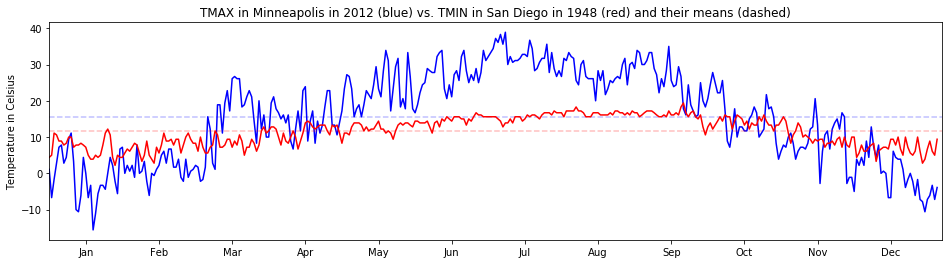

In [39]:
# Time to plot the temperature data for these two years
# This plot isn't anything fancy but just a starting point

pp.figure(figsize=(16,4)) # Figure size; default is a bit small

# Could smooth plot in case of noisy data, but does not seem necessary here
# For instance, use np.correlate(..., np.ones(some_length)/some_length, 'same')

pp.plot(minneapolis_tmax_all[warmest_year], color = 'blue') # Plot Minneapolis record high year
# Draw a horizontal line for the mean TMAX for the year as opaque dashed line in the same color
pp.axhline(warmest, color = 'blue', linestyle = 'dashed', alpha = .25)

pp.plot(san_diego_tmin_all[coldest_year], color = 'red') # Plot San Diego record low year
pp.axhline(coldest, color = 'red', linestyle = 'dashed', alpha = .25)

pp.axis(xmin=0) # Start x-axis at 0
pp.axis(xmax=366) # Note that both years happen to be leap years

tick_loc = [15 + 30*d for d in range(12)] # Place ticks roughly in middle of each month; easy to improve
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pp.xticks(tick_loc, labels)

pp.ylabel('Temperature in Celsius')

# This line simply is too long and therefore split across several lines
pp.title('TMAX in Minneapolis in {} (blue) '.format(warmest_year + 1939) +
         'vs. TMIN in San Diego in {} (red) '.format(coldest_year + 1940) +
         'and their means (dashed)')

# If iterating, could also gather and display other temperature data for those two years
# For example, also include TMIN for Minneapolis and TMAX for San Diego